In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [28]:
data = pd.read_csv("mt.csv")

# Splitting data into input (X) and output (Y) variables
X = data.iloc[:, :2]
Y1 = data.iloc[:, 2]
Y2 = data.iloc[:, 3]

# Normalizing input data
X = (X - np.mean(X,axis=0)) / np.std(X)

# Splitting data into training and validation sets
X_train, X_val, Y1_train, Y1_val, Y2_train, Y2_val = train_test_split(X, Y1, Y2, test_size=0.20)

In [29]:
# Setting seed for reproducibility
np.random.seed(42)

# Initializing weights and biases
w1 = np.random.randn(2, 5) * 0.01
b1 = np.zeros((1, 5))
w2 = np.random.randn(5, 4) * 0.01
b2 = np.zeros((1, 4))
w3 = np.random.randn(4, 2) * 0.01
b3 = np.zeros((1, 2))


In [30]:
# Implement a multi-task neural network from scratch (incl.
# back-propagation) having the following attributes:
# (i) 2 inputs (both continuous)
# (ii) 2 hidden layers (one has sigmoid and another has tanh as the
# activation function)
# (iii) 2 outputs (one for binary classification and another for regression)
# The data given is in data. 
# Use stochastic gradient descent
# approach and have 80:20 split for training and validation.
# NOTE: For such multi-task learning problems, you can do a weighted addition
# of the losses involved

# Setting hyperparameters
epochs = 50
learning_rate = 0.01

# Initializing losses
losses1 = []
losses2 = []

# Training the model
for i in range(epochs):
    # Forward propagation
    a1 = np.dot(X_train, w1) + b1
    z1 = np.tanh(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = 1 / (1 + np.exp(-a2))
    a3_1 = np.dot(z2, w3) + b3
    y1_pred = 1 / (1 + np.exp(-a3_1))
    a3_2 = np.dot(z2, w3) + b3
    y2_pred = np.dot(z2, w3) + b3

    # Computing loss for binary classification task
    delta_y1 = y1_pred - Y1_train.values.reshape(-1, 1)
    loss1= np.sum(-Y1_train.values.reshape(-1, 1) * np.log(y1_pred) - (1 - Y1_train.values.reshape(-1, 1)) * np.log(1 - y1_pred))
    losses1.append(loss1)

    # Computing loss for regression task
    delta_y2 = y2_pred - Y2_train.values.reshape(-1, 1)
    loss2 = np.sum(np.square(delta_y2))
    losses2.append(loss2)

    # Backpropagation
    d_w3_y1 = np.dot(z2.T, delta_y1)
    d_w3_y2 = np.dot(z2.T, delta_y2)
    delta_z2 = np.dot(delta_y1, w3.T) * (z2 * (1 - z2))
    d_w2 = np.dot(z1.T, delta_z2)
    delta_a1 = np.dot(delta_z2, w2.T) * (1 - np.power(z1, 2))
    d_w1 = np.dot(X_train.T, delta_a1)
    w1 -= learning_rate * d_w1
    b1 -= learning_rate * np.sum(delta_a1, axis=0, keepdims=True)
    w2 -= learning_rate * d_w2
    b2 -= learning_rate * np.sum(delta_z2, axis=0)
    w3 -= learning_rate * d_w3_y1 + learning_rate * d_w3_y2
    b3 -= learning_rate * np.sum(delta_y1, axis=0, keepdims=True) + learning_rate * np.sum(delta_y2, axis=0, keepdims=True)

    # Printing current epoch and total loss
    print("Epoch:", i+1, "Loss:", loss1 + loss2)

# Forward propagation on validation data
a1_val = np.dot(X_val, w1) + b1
z1_val = np.tanh(a1_val)
a2_val = np.dot(z1_val, w2) + b2
z2_val = 1 / (1 + np.exp(-a2_val))
a3_1_val = np.dot(z2_val, w3) + b3
y1_pred_val = 1 / (1 + np.exp(-a3_1_val))
a3_2_val = np.dot(z2_val, w3) + b3
y2_pred_val = np.dot(z2_val, w3) + b3

# Computing accuracy and mean squared error
pred1 = np.where(y1_pred_val > 0.5, 1, 0)
accuracy = np.mean(pred1 == Y1_val.values.reshape(-1, 1))
mse = np.mean(np.square(y2_pred_val - Y2_val.values.reshape(-1, 1)))
print("Accuracy:", accuracy)
print("Mean Squared Error:", mse)
print("RMSE:", np.sqrt(mse))


Epoch: 1 Loss: 13933.543239840792
Epoch: 2 Loss: 32444.840357661345
Epoch: 3 Loss: 77643.16500614872
Epoch: 4 Loss: nan
Epoch: 5 Loss: 7185435.936067793
Epoch: 6 Loss: nan
Epoch: 7 Loss: 55092921.085464016
Epoch: 8 Loss: nan
Epoch: 9 Loss: 94436.16985936686
Epoch: 10 Loss: 11274.871238371787
Epoch: 11 Loss: 4331.259403321552
Epoch: 12 Loss: 4293.923331367307
Epoch: 13 Loss: 4243.426605162353
Epoch: 14 Loss: 4251.228186941846
Epoch: 15 Loss: 4249.559277869668
Epoch: 16 Loss: 4249.891739670712
Epoch: 17 Loss: 4249.8245703805405
Epoch: 18 Loss: 4249.838102370868
Epoch: 19 Loss: 4249.835374637245
Epoch: 20 Loss: 4249.835924421101
Epoch: 21 Loss: 4249.835813607724
Epoch: 22 Loss: 4249.835835942946
Epoch: 23 Loss: 4249.835831441134
Epoch: 24 Loss: 4249.835832348493
Epoch: 25 Loss: 4249.8358321656
Epoch: 26 Loss: 4249.835832202467
Epoch: 27 Loss: 4249.8358321950445
Epoch: 28 Loss: 4249.83583219655
Epoch: 29 Loss: 4249.835832196226
Epoch: 30 Loss: 4249.835832196291
Epoch: 31 Loss: 4249.8358321

C:\Users\SAMYAK JAIN\AppData\Local\Temp\ipykernel_8696\2203907787.py:35: RuntimeWarning: divide by zero encountered in log
  loss1= np.sum(-Y1_train.values.reshape(-1, 1) * np.log(y1_pred) - (1 - Y1_train.values.reshape(-1, 1)) * np.log(1 - y1_pred))
C:\Users\SAMYAK JAIN\AppData\Local\Temp\ipykernel_8696\2203907787.py:35: RuntimeWarning: invalid value encountered in multiply
  loss1= np.sum(-Y1_train.values.reshape(-1, 1) * np.log(y1_pred) - (1 - Y1_train.values.reshape(-1, 1)) * np.log(1 - y1_pred))


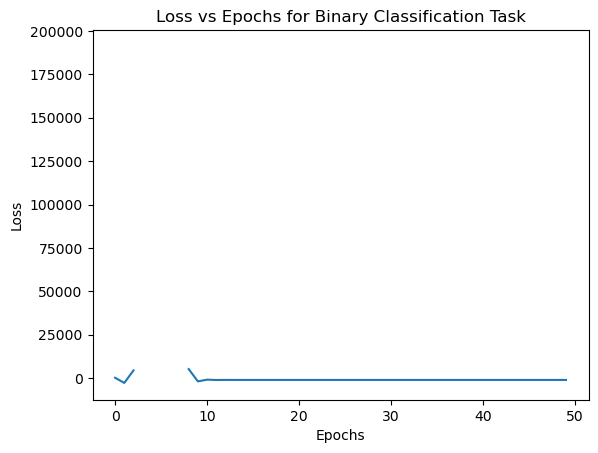

In [31]:
# Plotting losses1
plt.plot(losses1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs for Binary Classification Task")
plt.show()

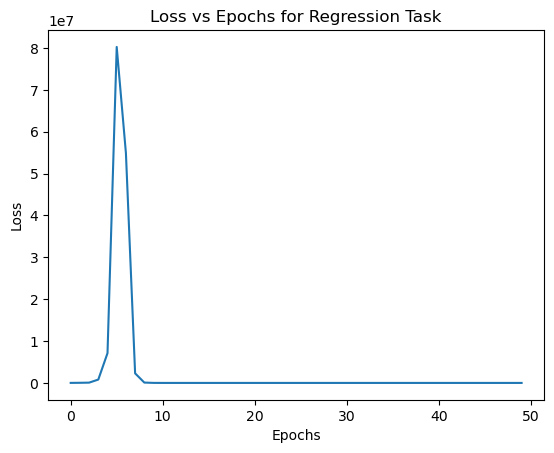

In [32]:
# Plotting losses2
plt.plot(losses2)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs for Regression Task")
plt.show()

In [33]:
print(pred1)

[[1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]]


In [34]:
print(y2_pred_val)

[[6.6445494 6.6445494]
 [6.6445494 6.6445494]
 [6.6445494 6.6445494]
 [6.6445494 6.6445494]
 [6.6445494 6.6445494]
 [6.6445494 6.6445494]
 [6.6445494 6.6445494]
 [6.6445494 6.6445494]
 [6.6445494 6.6445494]
 [6.6445494 6.6445494]
 [6.6445494 6.6445494]
 [6.6445494 6.6445494]
 [6.6445494 6.6445494]
 [6.6445494 6.6445494]
 [6.6445494 6.6445494]
 [6.6445494 6.6445494]
 [6.6445494 6.6445494]
 [6.6445494 6.6445494]
 [6.6445494 6.6445494]
 [6.6445494 6.6445494]
 [6.6445494 6.6445494]
 [6.6445494 6.6445494]
 [6.6445494 6.6445494]
 [6.6445494 6.6445494]
 [6.6445494 6.6445494]
 [6.6445494 6.6445494]
 [6.6445494 6.6445494]
 [6.6445494 6.6445494]
 [6.6445494 6.6445494]
 [6.6445494 6.6445494]]
